Interactive version of the tutorial: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/pgrigorev/neighbors-maps.git/HEAD?labpath=tutorials%2Fdefect_detection.ipynb)

In [2]:
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../")
from neighbor_map import Atoms
from ase.atoms import Atom


def get_cutoff(atoms, n_neightbours, cutoff=10.):
    """
    Function to get the distance of n_th neighbour using matscipy neighbour list.
    """
    from matscipy.neighbours import neighbour_list

    i, d = neighbour_list("id", atoms, cutoff=cutoff)
    first_atom_d = d[i == 0]
    first_atom_d.sort()
    return first_atom_d[n_neightbours]

We will look at four examples of cubic structures:
- Simple Cubic (SC): Po 
- Bulk Centered Cubic (BCC): Fe
- Face Centered Cubic (FCC): Ni
- Diamond: C

[Atomic Simulations Environment (ASE)](https://wiki.fysik.dtu.dk/ase/) has an excellent set of tools for [building things](https://wiki.fysik.dtu.dk/ase/ase/build/build.html). We just need to provide the symbol of the element and it will create a unit cell with the structure and lattice parameter from the internal database. 

In [50]:
from ase.build import bulk

unit_cells = []
for symbol in ["Po", "Fe", "Ni", "C"]:
    unit_cells.append(bulk(symbol, cubic=True))
    

Lets have a look on the structures. We will use [nglview](https://github.com/nglviewer/nglview) for interactive visulisations.

In [88]:
def show_structures(structures, labels):
    from nglview import show_ase, ASEStructure

    # create an empty canvas
    view = show_ase(structures[0], default_representation=False)
    view.remove_component(view[0])

    for label, structure in zip(labels, structures):
        # add new component to visualise
        component  = view.add_component(ASEStructure(structure), default_representation=False, name=label + " " + str(structure.symbols))
        
        # set up the vew as just atomic spheres with unit cell
        scale=0.5
        component.add_spacefill()
        component.update_spacefill(radiusType='covalent',
                                radiusScale=scale)
        component.add_unitcell()

        # show only simple cubic in starting window
        if label != "Simple Cubic":
            component.hide()

    view.camera = 'orthographic'
    view.parameters = {"clipDist": 0}

    view.gui_style = "NGL"
    return view

In [93]:
labels = ["Simple Cubic", "BCC", "FCC", "Diamond"]
show_structures(unit_cells, labels=labels)

NGLWidget(gui_style='ngl')

Lets look on the larger cells that we will use as a mode of bulk structures. To create on we just need to replicate the unit cell N times in each directions. We will use the cells of size 4x4x4 in this tutorial.

In [91]:
bulks = []
vacancies = []
interstitials = []

for unit_cell in unit_cells:
    bulk = unit_cell * [4, 4, 4]
    bulks.append(Atoms(bulk))
    
    vacancy = bulk.copy()
    del vacancy[1]
    vacancies.append(Atoms(vacancy))

    interstitial = bulk.copy()
    interstitial.extend(Atom(symbol, (2.5, 2.5, 1.5)))
    interstitials.append(Atoms(interstitial))

In [94]:
show_structures(bulks, labels=labels)

NGLWidget(gui_style='ngl')

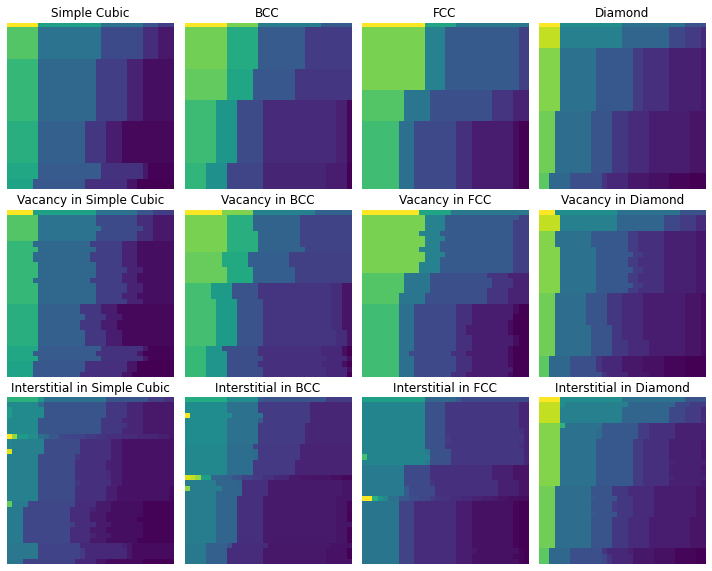

In [95]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))

for structure, title, ax in zip(bulks, labels, axes[0]):

    ax.imshow(structure.get_descriptor(atom_id=0, r_cut=1.2 * get_cutoff(structure, 32), img_target_size=32))
    ax.set_title(title)
    ax.axis("off")

for structure, title, ax in zip(vacancies, labels, axes[1]):

    ax.imshow(structure.get_descriptor(atom_id=0, r_cut=1.2 * get_cutoff(structure, 32), img_target_size=32))
    ax.set_title("Vacancy in " + title)
    ax.axis("off")


for structure, title, ax in zip(interstitials, labels, axes[2]):

    ax.imshow(structure.get_descriptor(atom_id=0, r_cut=1.2 * get_cutoff(structure, 32), img_target_size=32))
    ax.set_title("Interstitial in " + title)
    ax.axis("off")

    
fig.tight_layout()

The preliminary outline of the tutorial:
- Introduction to neighbour maps as above (maybe more details about how it is constructed). Maybe add 3D interactive NGlView visualisations of atomic configurations?
- Training of the classifier on the on defects identified by Distortion Scores. Data should be provided in `data` folder. (Ask Sacha)
- Application to the MD data of the cascade. Ideally I should provide a MD simulation where C15 cluster is formed. Perhaps will need few cascades one after another. We should think how we then use the mapping: just a nice movie or extraction of physical data such as temperature of molten region etc.?

Do you think interactive plots could be helpful?